In [8]:
# what didnt work:
# some priority queue optimizing on time or score (too stupid)
# backtracking with memoization (too many options since 225.000 states without elephant already)
# backtracking 26 steps with 1 agent and memo the results to afterwards partition them
from functools import cache
from collections import defaultdict, deque
from operator import itemgetter
from typing import ItemsView
from aocutils.common import ints
from aocutils.math import all_combinations
from aocutils.maze import distances

f = open("in.txt").read().split("\n")
lines = [line for line in f]
scores = defaultdict(int)
edges = set()
hasflow = set()
for line in lines:
    # print(line)
    start, end = line.split("to valve")
    flow = ints(start)[0]
    startvalve = start[6:8]
    end = end.replace("s", "")
    endvalves = end.split(",")
    ends = [v[-2:] for v in endvalves]
    for e in ends:
        edges.add((startvalve, e))
    scores[startvalve] = flow
    if flow: hasflow.add(startvalve)

hasflow.add("AA")
valvetoint = {val: 1<<idx for idx, val in enumerate(sorted(hasflow))}
scores = {valvetoint[k]:v for k,v in scores.items() if v != 0 or k == 'AA'}

# from AA to DD is certain length
connval = {(valvetoint[i], valvetoint[j]) : d for (i,j), d in distances(edges).items() if i in hasflow and j in hasflow}

In [14]:
@cache
def explore(valve, timeleft, free,elephant=False):
    best = 0
    for n in valvetoint.values():
        t = connval.get((valve, n), 0)
        if n != valve and (free & n) and (t < timeleft):
            newtimeleft = timeleft - t - 1
            score = explore(n, newtimeleft, free - n, elephant) + scores[n] * newtimeleft
            best = max(score, best)
    if not best and elephant:
        # we cannot go any further, let the elephant to its thing with the remaining valves
        return explore(valvetoint['AA'], totaltime,free)
    return best

totaltime = 26
explore(valvetoint['AA'], totaltime, (1<<16)-1, elephant = True)

2422

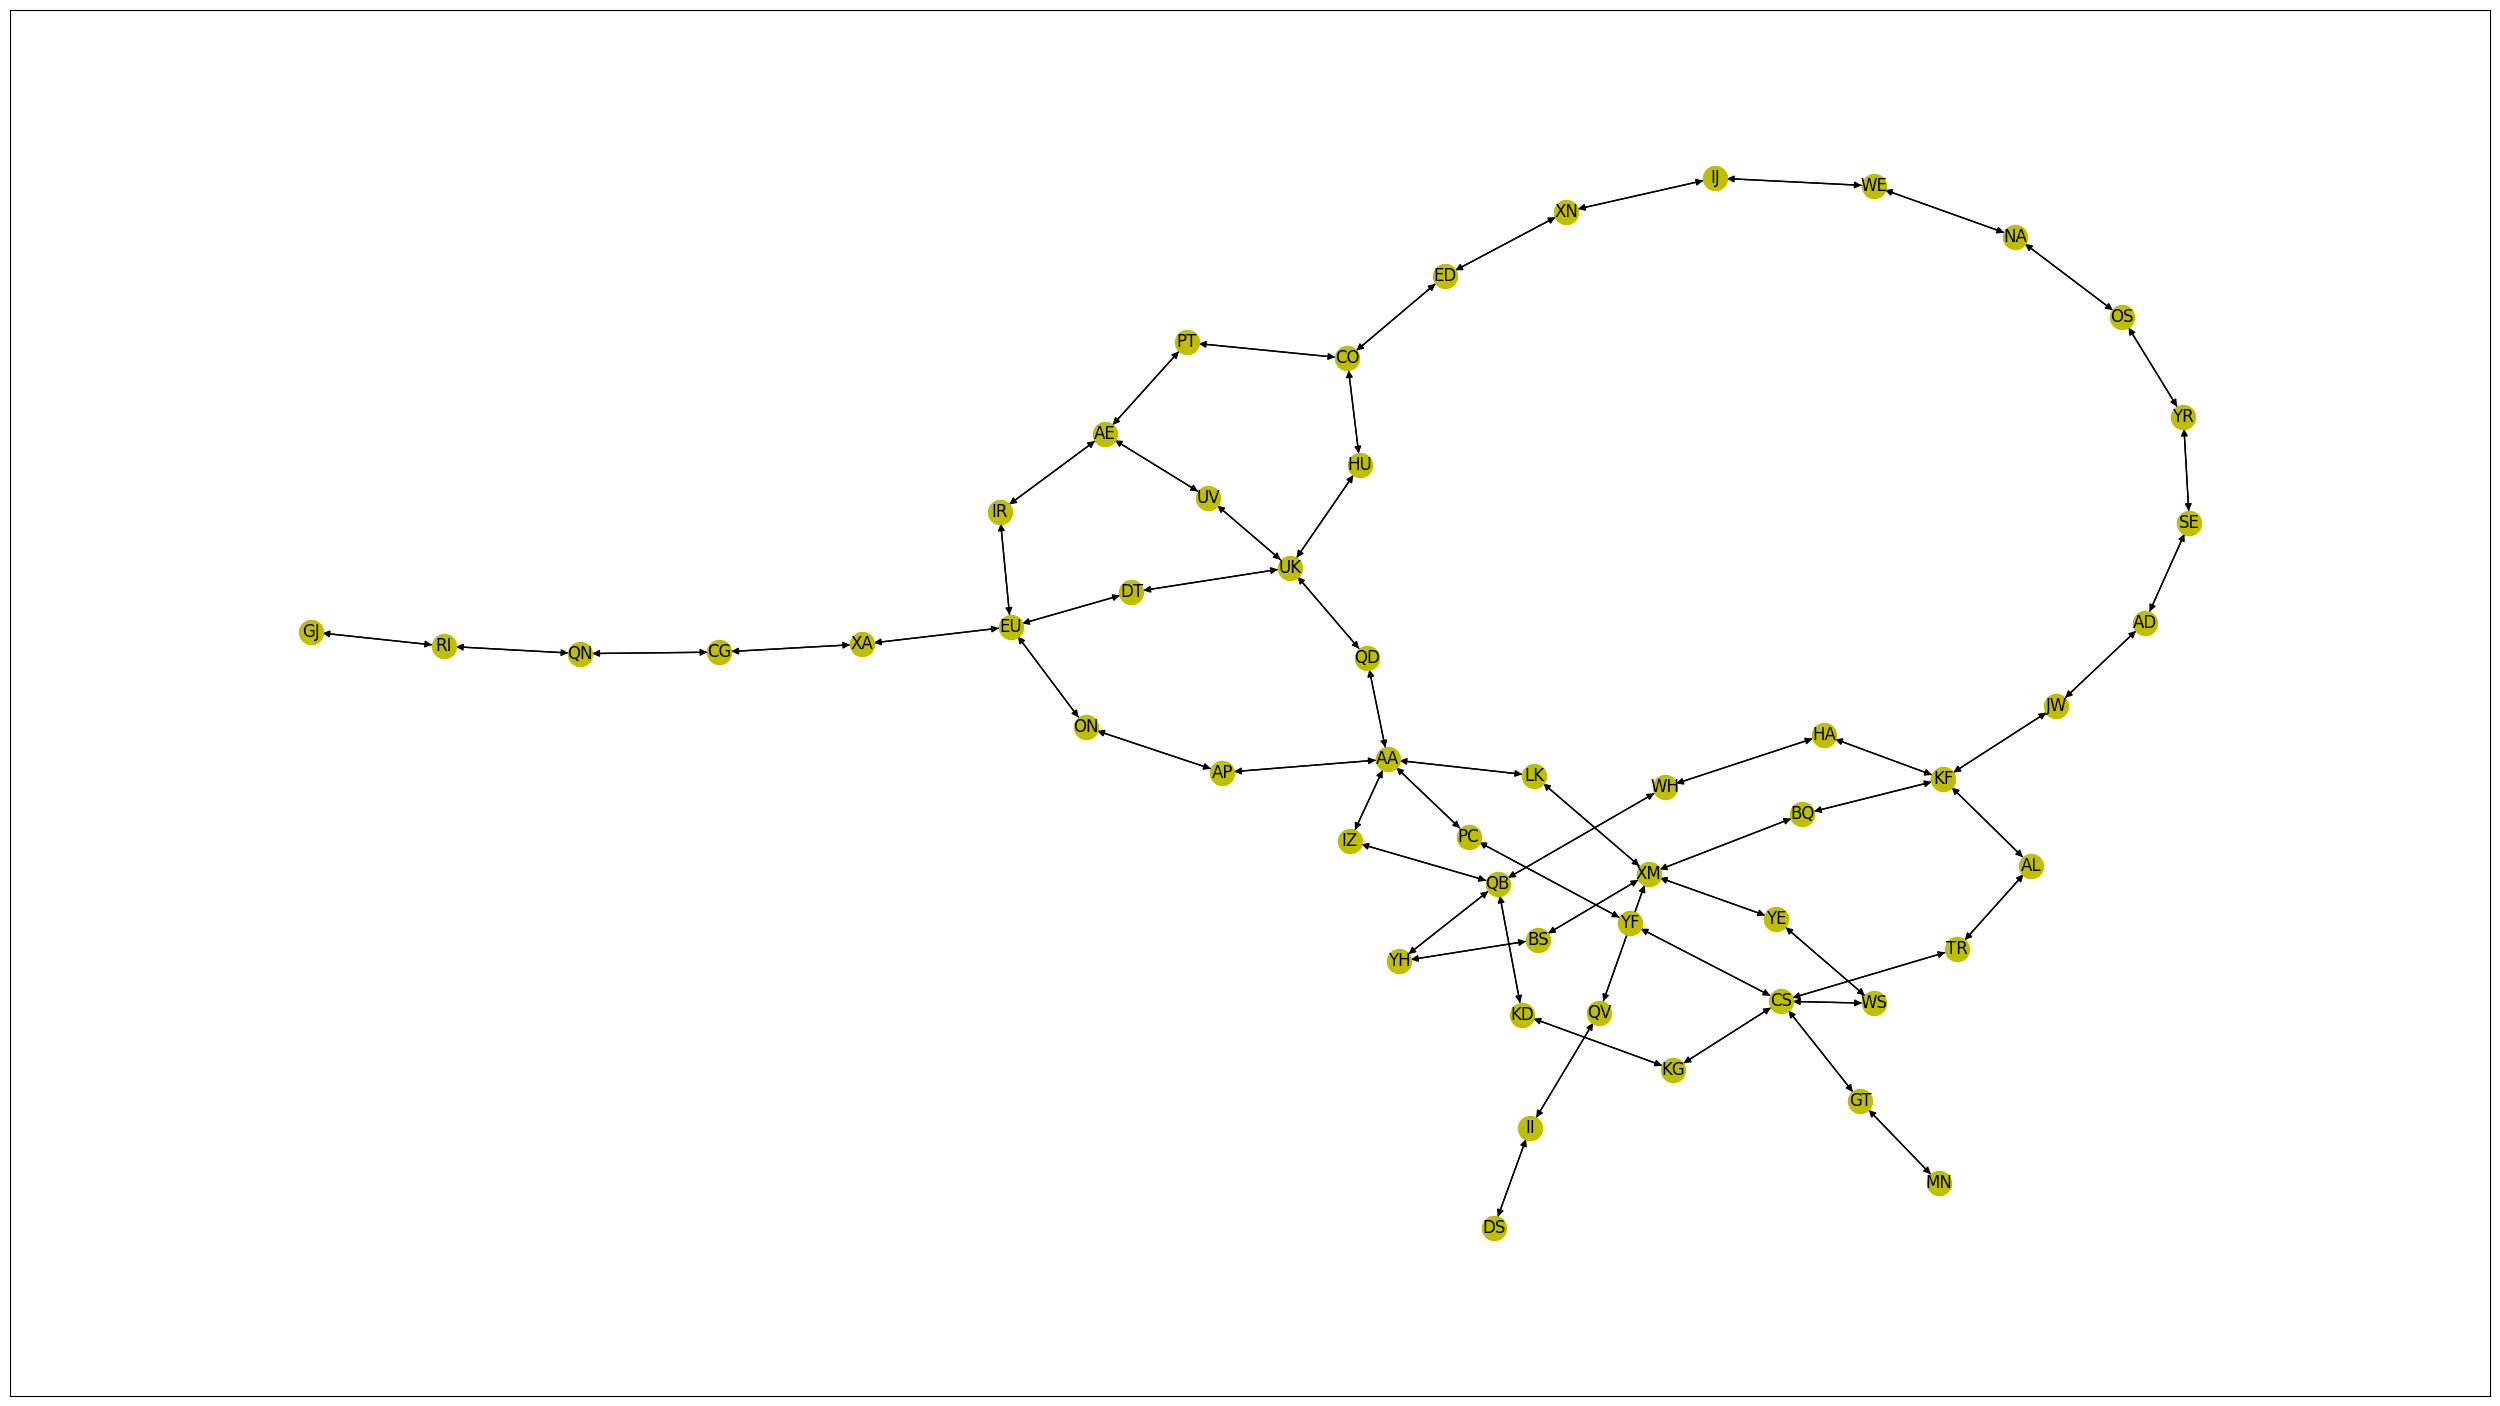

In [35]:
#| export
def visualize_graph(edges:set, labels=None):
    '''
    Plots graph.
    edges: set with tuples (fromnode, tonode)
    labels: optional dictionary with node descriptions. If None, the node variable names will be used

    If the names are passed and the node is not found, 'Missing'will be appended in the label
    
    Usage example:
        from aocutils.special import visualize_graph, labelize
        visualize_graph(edges, labelize(lines))
    '''
    missing = 'Missing'
    if not labels: 
        labels = {}
        missing = ''

    G = nx.DiGraph()
    for k,v in edges:
    

        # weight = 'jmp' if lines[k][0].startswith('j') else ''
        weight = ''
        G.add_edge(labels.get(k, missing+str(k)), labels.get(v, missing+str(v)), weight=weight)
    # color_map = [party_colors[node] for node in G]
    pos = nx.nx_agraph.graphviz_layout(G,prog='neato', args ='')
    plt.figure(figsize=(32,18))
    nx.draw_networkx(G, pos,font_size=12, node_color='y')
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,label_pos=0.5, font_size=12)
    plt.margins(0.1,0.1)
visualize_graph(edges)

Kinda looks like an elephant right?